In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
! pip install seaborn



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

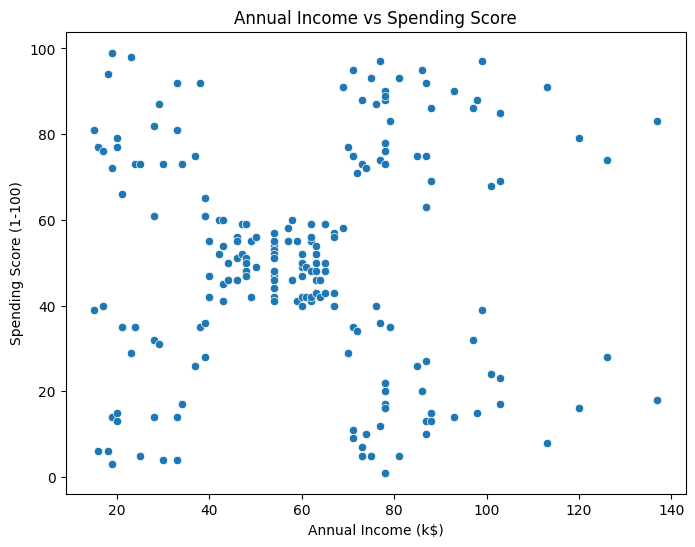

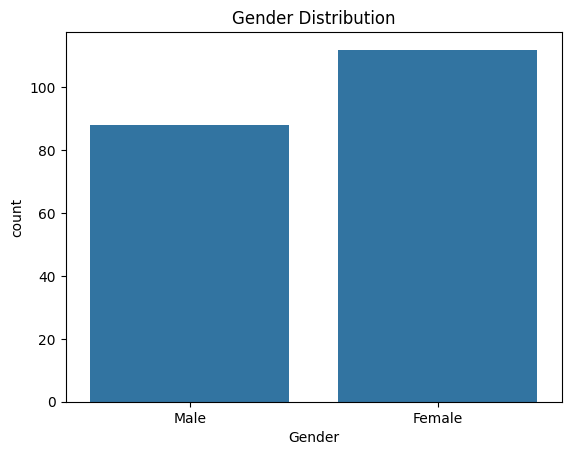

In [5]:
# Scatterplot of features used for clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

# Countplot inspecting Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [6]:
#Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
#Preprocess (scaling the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) 

# Fit and predict clusters
clusters = dbscan.fit_predict(X_scaled)

# Add cluster label column to dataframe
df['DBSCAN_Cluster'] = clusters

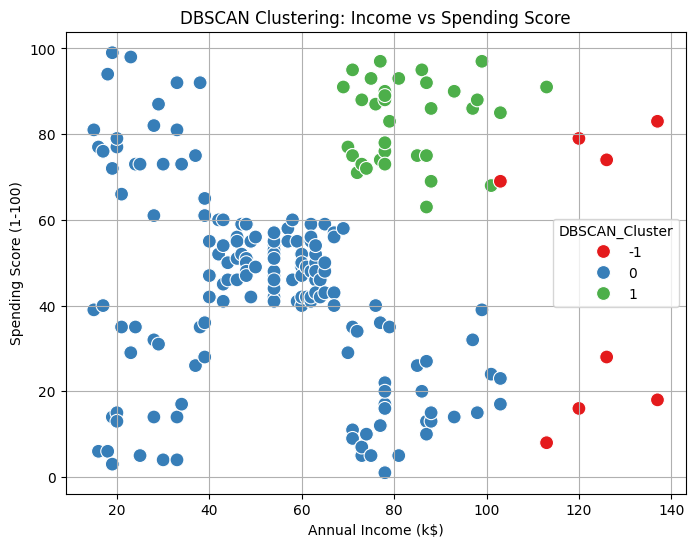

In [9]:
# Visualize clusters 
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['DBSCAN_Cluster'], palette='Set1', legend='full', s=100)
plt.title('DBSCAN Clustering: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [13]:
# Analyzing outliers
outliers = df[df['DBSCAN_Cluster'] == -1]
print("\nNumber of outliers detected:", outliers.shape[0])
print("\nOutlier Statistics:\n", outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())


Number of outliers detected: 8

Outlier Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count   8.000000            8.000000                8.000000
mean   35.750000          122.750000               46.875000
std     6.497252           11.510864               32.108911
min    30.000000          103.000000                8.000000
25%    32.000000          118.250000               17.500000
50%    32.500000          123.000000               48.500000
75%    37.500000          128.750000               75.250000
max    47.000000          137.000000               83.000000


In [10]:
# Only calculate for non-outliers (exclude -1) and if there are 2+ clusters
labels = df['DBSCAN_Cluster']
mask = labels != -1  # Exclude outliers
if len(set(labels[mask])) > 1:  # at least 2 clusters
    score = silhouette_score(X_scaled[mask], labels[mask])
    print("Silhouette Score (higher is better, -1 to 1):", score)
else:
    print("Silhouette Score not calculated: fewer than 2 clusters (excluding outliers).")

Silhouette Score (higher is better, -1 to 1): 0.3875583892728279


In [11]:
#Analyze outliers
outliers = df[df['DBSCAN_Cluster'] == -1]
print("Number of outliers detected:", outliers.shape[0])
print(outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())


Number of outliers detected: 8
             Age  Annual Income (k$)  Spending Score (1-100)
count   8.000000            8.000000                8.000000
mean   35.750000          122.750000               46.875000
std     6.497252           11.510864               32.108911
min    30.000000          103.000000                8.000000
25%    32.000000          118.250000               17.500000
50%    32.500000          123.000000               48.500000
75%    37.500000          128.750000               75.250000
max    47.000000          137.000000               83.000000


In [12]:
cluster_summary = df.groupby('DBSCAN_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


                      Age  Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                                       
-1              35.750000          122.750000               46.875000
 0              40.369427           52.490446               43.101911
 1              32.742857           82.542857               82.800000
